In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.cluster import AgglomerativeClustering



In [32]:
image = cv2.imread("/content/Sample Image.jpg")  # replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_shape = image.shape


In [33]:
small_image = cv2.resize(image, (100, 100))  # only 10k pixels
pixels_small = small_image.reshape((-1, 3))

In [34]:
def mask_brightest(pixels, labels, n_clusters):
    brightness = []
    for label in range(n_clusters):
        cluster_mean = pixels[labels == label].mean(axis=0)
        brightness.append(cluster_mean.sum())
    background_label = np.argmax(brightness)
    masked = pixels.copy()
    masked[labels == background_label] = [255, 255, 255]
    return masked

In [35]:
pixels_full = image.reshape((-1, 3))
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(pixels_full)
masked_kmeans = mask_brightest(pixels_full, labels_kmeans, 2)
seg_kmeans = masked_kmeans.reshape(original_shape)

In [36]:
agglo = AgglomerativeClustering(n_clusters=2)
labels_agglo_small = agglo.fit_predict(pixels_small)
masked_agglo_small = mask_brightest(pixels_small, labels_agglo_small, 2)
seg_agglo = cv2.resize(masked_agglo_small.reshape(small_image.shape),
                       (original_shape[1], original_shape[0]))


In [37]:
dbscan = DBSCAN(eps=10, min_samples=20)  # tune eps for your image
labels_dbscan_small = dbscan.fit_predict(pixels_small)


In [38]:
unique_labels = [l for l in np.unique(labels_dbscan_small) if l != -1]
if len(unique_labels) >= 2:
    brightness_dbscan = []
    for label in unique_labels:
        cluster_mean = pixels_small[labels_dbscan_small == label].mean(axis=0)
        brightness_dbscan.append(cluster_mean.sum())
    background_label = unique_labels[np.argmax(brightness_dbscan)]
else:
    background_label = -1

masked_dbscan_small = pixels_small.copy()
masked_dbscan_small[labels_dbscan_small == background_label] = [255, 255, 255]
seg_dbscan = cv2.resize(masked_dbscan_small.reshape(small_image.shape),
                        (original_shape[1], original_shape[0]))


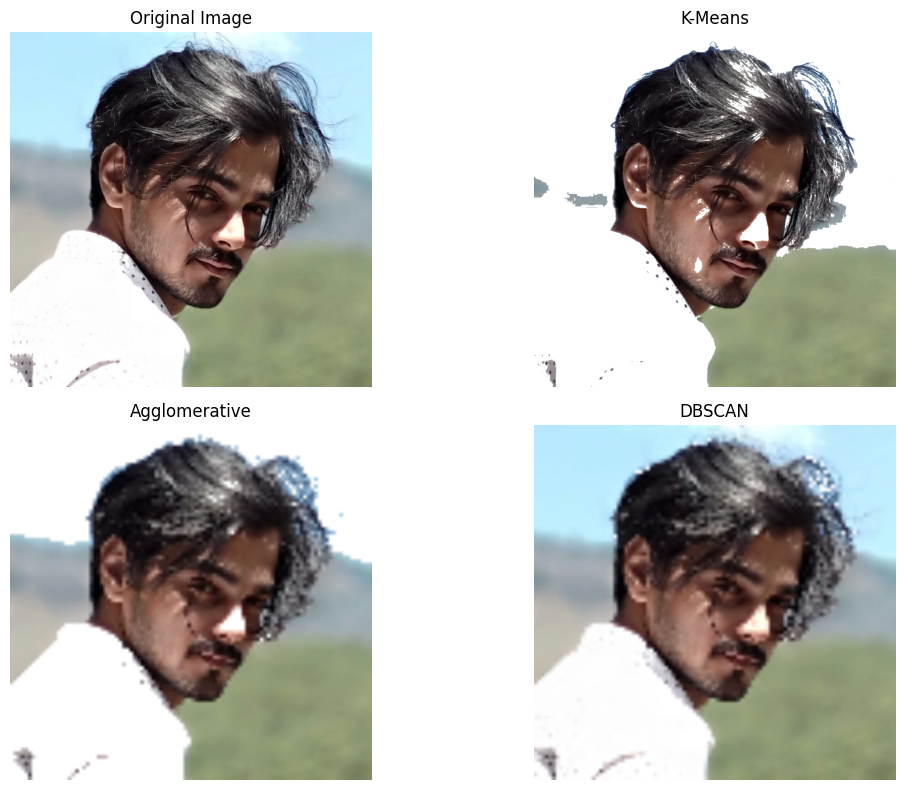

In [39]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(seg_kmeans)
plt.title("K-Means")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(seg_agglo)
plt.title("Agglomerative")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(seg_dbscan)
plt.title("DBSCAN")
plt.axis("off")

plt.tight_layout()
plt.show()

Library

In [40]:
agglo_lib = AgglomerativeClustering(n_clusters=2)
labels_agglo_lib = agglo_lib.fit_predict(pixels_small)
# Assign average color of each cluster
colors_agglo = np.array([pixels_small[labels_agglo_lib == i].mean(axis=0) for i in range(2)])
seg_agglo_lib_small = colors_agglo[labels_agglo_lib]
seg_agglo_lib = cv2.resize(seg_agglo_lib_small.reshape(small_image.shape),
                           (original_shape[1], original_shape[0])).astype(np.uint8)

In [41]:
# --- DBSCAN Library-Style (safe reshape) ---
dbscan_lib = DBSCAN(eps=10, min_samples=20)
labels_dbscan_lib = dbscan_lib.fit_predict(pixels_small)

# Create random colors for each label, including noise (-1)
unique_labels = np.unique(labels_dbscan_lib)
colors_dbscan = {label: np.random.randint(0, 255, size=3) if label != -1 else [0, 0, 0]
                 for label in unique_labels}

# Map each pixel to its color
seg_dbscan_lib_small = np.array([colors_dbscan[label] for label in labels_dbscan_lib], dtype=np.uint8)

# Reshape safely
seg_dbscan_lib_small = seg_dbscan_lib_small.reshape(small_image.shape)
seg_dbscan_lib = cv2.resize(seg_dbscan_lib_small, (original_shape[1], original_shape[0]))


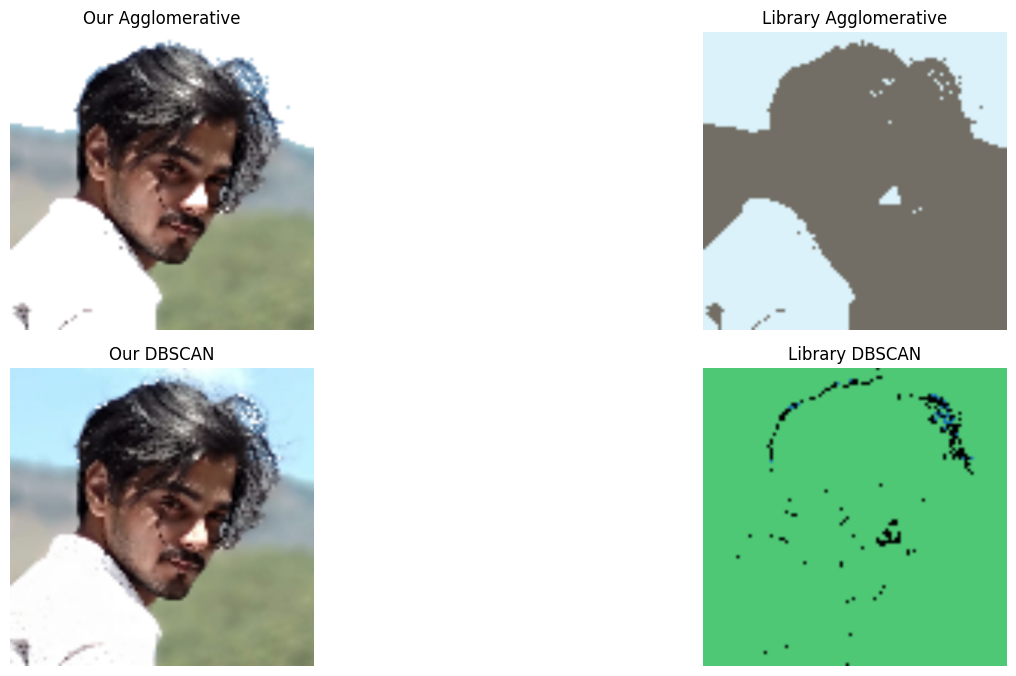

In [42]:
plt.figure(figsize=(14, 10))


plt.subplot(3, 2, 3)
plt.imshow(seg_agglo)
plt.title("Our Agglomerative")
plt.axis("off")

plt.subplot(3, 2, 5)
plt.imshow(seg_dbscan)
plt.title("Our DBSCAN")
plt.axis("off")

# Library Defaults

plt.subplot(3, 2, 4)
plt.imshow(seg_agglo_lib)
plt.title("Library Agglomerative")
plt.axis("off")

plt.subplot(3, 2, 6)
plt.imshow(seg_dbscan_lib)
plt.title("Library DBSCAN")
plt.axis("off")

plt.tight_layout()
plt.show()
